In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_emails = pd.read_csv('email_data.csv',delimiter=',')
display(df_emails.head())

df_activity = pd.read_csv('activity_data.csv',delimiter=',')
display(df_activity.head())

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,NaN,NaN


,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


**QUESTION 1**

In [3]:
# Total number of rows in the two datasets are

print("Total Number of rows in the Email dataset = {val_email}".format(val_email = len(df_emails)))
print("Total Number of rows in the Activity dataset = {val_activity}".format(val_activity = len(df_activity)))

# Given that this log of emails is just 3% of all emails sent over the period.
sent = len(df_emails)
total = (sent*100)/3

print("Total Number of Emails sent over the period = {sent_email}".format(sent_email = int(total)))

Total Number of rows in the Email dataset = 474163
Total Number of rows in the Activity dataset = 4559973
Total Number of Emails sent over the period = 15805433


**QUESTION 2**

In [14]:
#Importing libraries for date/time manipulations
from datetime import datetime
from pytz import timezone
import pytz

In [15]:
#Setting new column that converts series objects to datetime objects
df_emails['EmailSentDateTimeUtc_new'] = pd.to_datetime(df_emails['EmailSentDateTimeUtc'])

# Setting this new column as the index of the dataframe to perform conversions.
# Specifically set it to the index because tz applies operations on the index and not the data
df_emails.set_index('EmailSentDateTimeUtc_new', drop=False,inplace=True)

# Covert to Pacific Time from UTC
df_emails.index = df_emails.index.tz_localize('UTC').tz_convert('US/Pacific')

# Output date-time format
date_format='%m/%d/%Y %H:%M'

# Most Recent Date
date_recent = max(df_emails.index)
# Earliest Date
date_earliest = min(df_emails.index)

print('Most recent date & time is:', date_recent.strftime(date_format))
print('Earliest date & time is:', date_earliest.strftime(date_format))


Most recent date & time is: 04/19/2021 06:45
Earliest date & time is: 01/03/2018 20:29


**QUESTION 3**

In [42]:
# Groupby emails by zipcode and print count of emails received
df_zip = df_emails.groupby(by='ZipCode')
# Setting the head count to 10 as we need only the top 10 values.
s = df_zip.size().sort_values(ascending=False).head(10)
pd.DataFrame({'Zipcode':s.index.astype(int), 'Counts':s.values})

,Zipcode,Counts
0,63301,312
1,33801,310
2,34210,299
3,38301,295
4,67460,285
5,95971,277
6,42301,266
7,36104,254
8,40769,234
9,85225,229


**QUESTION 4**

In [46]:
# Library for plotting
import matplotlib.pyplot as plt

In [44]:
#Manipulate dataframe to add a month-year column
df_emails['month']=df_emails.index.month
df_emails['year'] = df_emails.index.year

# Groupby emails by month and year
df_group = df_emails.groupby(by=['year','month'])

# Get total number of emails sent in every group
total_val = df_group.size().to_list()

#Representation List for further plots
cons = []
for i,g in enumerate(df_group):
    cons.append(str(g[0][1])+'/'+ str(g[0][0]))

In [45]:
# List of distinct users in each group
dist_val = []
for i,g in enumerate(df_group):
    count = 0
    df4 = g[1].groupby(by='UserId')
    dist_val.append(len(df4))

In [47]:
# List of percentages of active users per group
per = []
for i,g in enumerate(df_group):
    df6 = g[1].UserId.isin(df_activity.UserId)
    df6 = df6[df6.values == True]
    count = len(df6)
    per.append((count/total_val[i])*100)

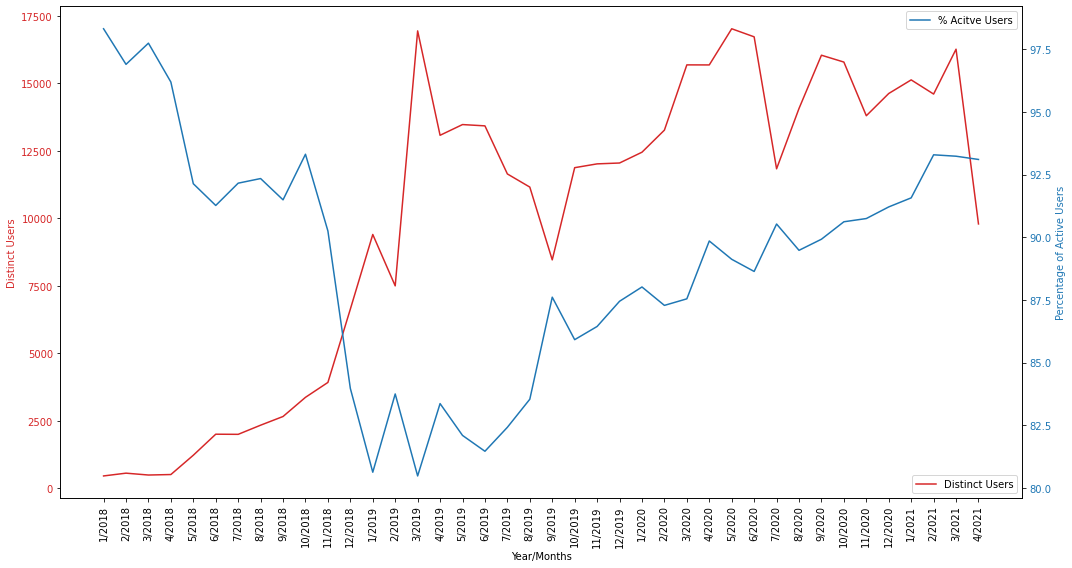

In [56]:
fig, ax1 = plt.subplots(figsize=(15,8))

# Overwriting x axis labels with group names
xi = list(range(len(cons)))

# Plotting Distinct User per Group
color = 'tab:red' # Color of the plot
ax1.set_xlabel('Year/Months') # X axis label
ax1.set_ylabel('Distinct Users', color=color) # Y axis label with color distinction
ax1.tick_params(axis='y', labelcolor=color) # Y axis values with color distinction
ax1.set_xticks(xi,x,rotation=90) # Rotating the names of the x axis for better visualization
ax1.plot(cons, dist_val, color=color,label='Distinct Users')

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

"""
NOTE: We will not set any x-axis formatting for the second plot as both plots share the same axis which is already formatted.
"""

#Plotting % of Active Users per group
color = 'tab:blue' # Color of the plot
ax2.set_ylabel('Percentage of Active Users', color=color) # Y axis label with color distinction
ax2.tick_params(axis='y', labelcolor=color) # Y axis values with color distinction
ax2.plot(cons, per, color=color, label='% Acitve Users')


fig.tight_layout()
ax1.legend(loc = 'lower right')
ax2.legend(loc = 'upper right')
plt.show()